In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist=input_data.read_data_sets("MNISTS_data/",one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNISTS_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNISTS_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNISTS_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNISTS_data/t10k-labels-idx1-ubyte.gz


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [6]:
mnist.train.num_examples

55000

In [13]:
mnist.test.num_examples

10000

In [11]:
 mnist.train.images.shape


(55000, 784)

In [12]:
mnist.train.images[1]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

In [38]:
a=mnist.train.images[2].reshape(28,28)

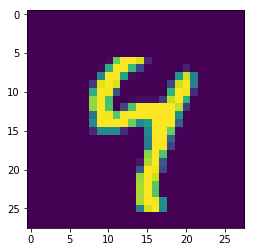

In [39]:
plt.imshow(a)

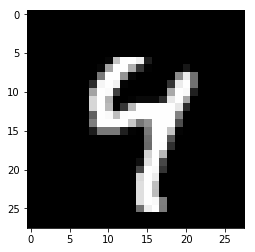

In [40]:
plt.imshow(a,cmap='gist_gray')

In [41]:
b=a

In [42]:
b[b>0]=1

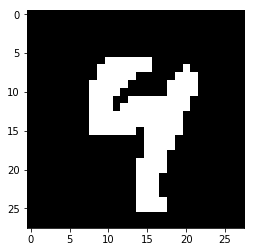

In [43]:
plt.imshow(a,cmap='gist_gray')

In [45]:
a.min()

0.0

In [46]:
a.max()

1.0

In [47]:
X=tf.placeholder(tf.float32,shape=[None,784])

#Placeholder

In [49]:
W=tf.Variable(tf.zeros([784,10]))
b=tf.Variable(tf.zeros([10]))
# <.>or with "tf.random_normal()"

#VARIABLE

In [62]:
#CREATE GRAPH OPERATIONS
y=tf.matmul(X,W) + b

In [63]:
#LOSS FUNCTION

y_true=tf.placeholder(tf.float32,shape=[None,10])

In [64]:
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y))

In [65]:
#OPTIMIZER
optm=tf.train.GradientDescentOptimizer(learning_rate=0.5)


In [66]:
#train
train=optm.minimize(cross_entropy)

In [67]:
init=tf.global_variables_initializer()

In [84]:
with tf.Session() as sess:
    
    sess.run(init)
    
    for step in range(3200):
        
        batch_x, batch_y = mnist.train.next_batch(256)
        
        sess.run(train,feed_dict={X:batch_x,y_true:batch_y})
        
    #EVALUATE THE MODEL
    correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    
    
    #O/P:- [True,False,True....]---->[1,0,1]
    
    acc= tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    
    
    
    
    print(sess.run(acc,feed_dict={X:mnist.test.images,y_true:mnist.test.labels}))

0.9241
